In [8]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob
import tensorflow as tf
import matplotlib.gridspec as gridspec
from torchvision import datasets, transforms

In [2]:
import sys
sys.path.append('../')
from data import get_loaders

In [3]:
%load_ext autoreload
%autoreload 1

In [114]:
def plot_clusters(data, run_name, seed=123):
    fig_name = 'figs_gluster/%s.png' % run_name
    data = torch.load('figs_gluster/%s.pth.tar' % run_name)
    assign_i, target_i, pred_i, loss_i, normC = data['assign'], data['target'], data['pred'], data['loss'], data['normC']
    pad = 2
    nsamples = 20
    np.random.seed(seed)

    train_dataset = datasets.MNIST(
            '../data/mnist', train=True, download=True,
            transform=transforms.Compose([
                transforms.ToTensor()
            ]))

    _, counts = np.unique(assign_i, return_counts=True)

    nclusters = len(counts)
    height = nclusters
    width = nsamples
    plt.figure(figsize=(7 * width, 4 * height))
    plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
    
    hpad = 28+2*pad
    images = np.zeros((nclusters, nsamples, 3, hpad, hpad))
    print('Train loss: %.4f' % (loss_i.mean()))
    print('Train accuracy: %.2f%%\n' % (((target_i==pred_i)*100.).mean()))
    for i in range(nclusters):
        idx, _ = np.where(assign_i==i)
        print('Cluster %d, size: %d' % (i, len(idx)))
        print('Cluster %d, normC: %.8f' % (i, normC[i]))
        print('Cluster %d, loss: %.4f' % (i, loss_i[idx].mean()))
        print('Cluster %d, accuracy: %.2f%%\n' % (i, ((target_i[idx]==pred_i[idx])*100.).mean()))
        np.random.shuffle(idx)
        for j in range(nsamples):
            xi = train_dataset[idx[j]][0]
            xi2 = np.zeros((3, hpad, hpad))
            xi2[0] = (pred_i[idx[j]]!=target_i[idx[j]])
            xi2[0:1, pad:28+pad, pad:28+pad] = xi
            xi2[1:2, pad:28+pad, pad:28+pad] = xi
            xi2[2:3, pad:28+pad, pad:28+pad] = xi
            images[i, j] = xi2

    xi = vutils.make_grid(torch.tensor(images.reshape(-1, 3, hpad, hpad)), nrow=nsamples, normalize=True, scale_each=True)

    plt.imshow(xi.numpy().transpose([1,2,0]))
    plt.axis('off')
    plt.savefig(fig_name, dpi=100, bbox_inches='tight')

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 17564
Cluster 0, normC: 0.00910387
Cluster 0, loss: 0.1716
Cluster 0, accuracy: 95.04%

Cluster 1, size: 42436
Cluster 1, normC: 0.00354341
Cluster 1, loss: 0.0675
Cluster 1, accuracy: 98.11%



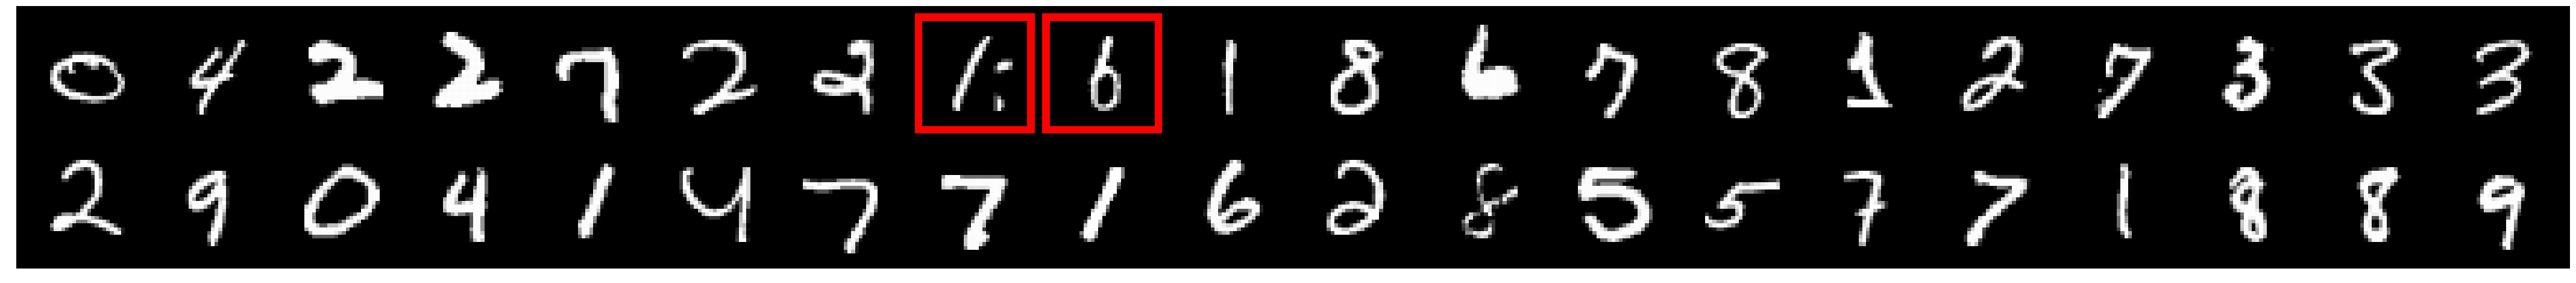

In [118]:
run_name='mlp,nclusters_2,citers_2'
plot_clusters(data, run_name)

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 941
Cluster 0, normC: 0.10720705
Cluster 0, loss: 1.5489
Cluster 0, accuracy: 38.58%

Cluster 1, size: 59059
Cluster 1, normC: 0.00135900
Cluster 1, loss: 0.0748
Cluster 1, accuracy: 98.15%



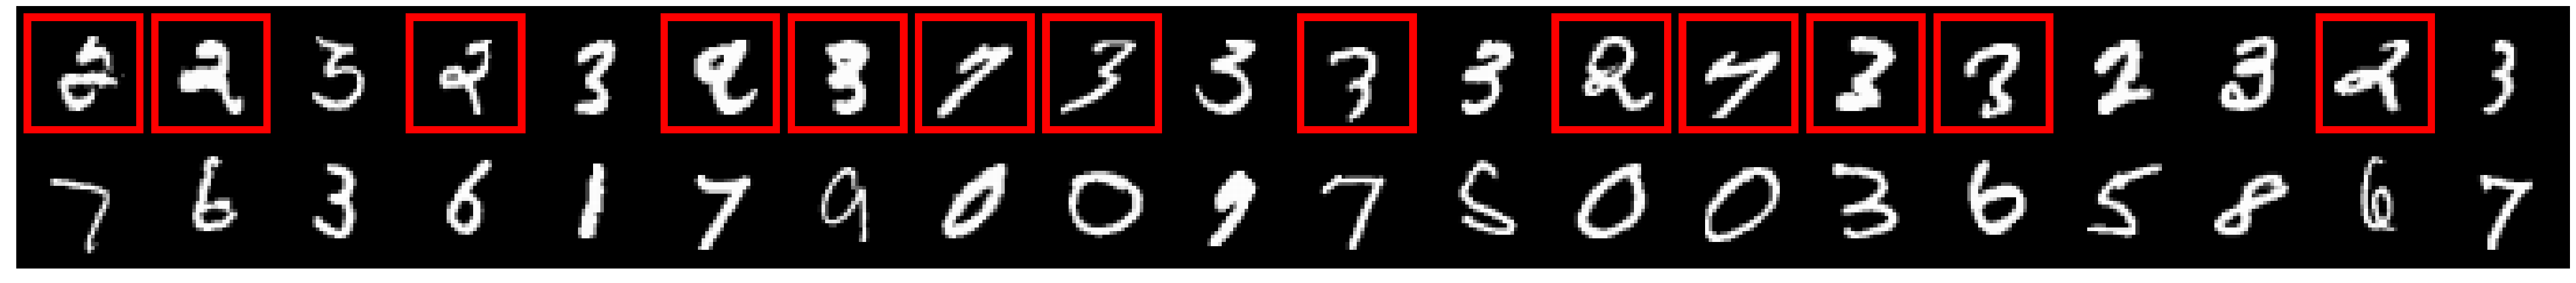

In [119]:
run_name='mlp,nclusters_2,citers_10'
plot_clusters(data, run_name)

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 554
Cluster 0, normC: 0.13881443
Cluster 0, loss: 1.4553
Cluster 0, accuracy: 40.07%

Cluster 1, size: 264
Cluster 1, normC: 0.14280315
Cluster 1, loss: 1.3774
Cluster 1, accuracy: 41.29%

Cluster 2, size: 583
Cluster 2, normC: 0.13515103
Cluster 2, loss: 1.3426
Cluster 2, accuracy: 45.80%

Cluster 3, size: 300
Cluster 3, normC: 0.11932945
Cluster 3, loss: 1.4607
Cluster 3, accuracy: 45.00%

Cluster 4, size: 459
Cluster 4, normC: 0.08940046
Cluster 4, loss: 1.3171
Cluster 4, accuracy: 52.51%

Cluster 5, size: 543
Cluster 5, normC: 0.10827202
Cluster 5, loss: 1.2735
Cluster 5, accuracy: 52.49%

Cluster 6, size: 394
Cluster 6, normC: 0.09047596
Cluster 6, loss: 0.8733
Cluster 6, accuracy: 72.59%

Cluster 7, size: 750
Cluster 7, normC: 0.04271078
Cluster 7, loss: 0.4544
Cluster 7, accuracy: 89.60%

Cluster 8, size: 2535
Cluster 8, normC: 0.02237182
Cluster 8, loss: 0.1976
Cluster 8, accuracy: 98.86%

Cluster 9, size: 53618
Cluste

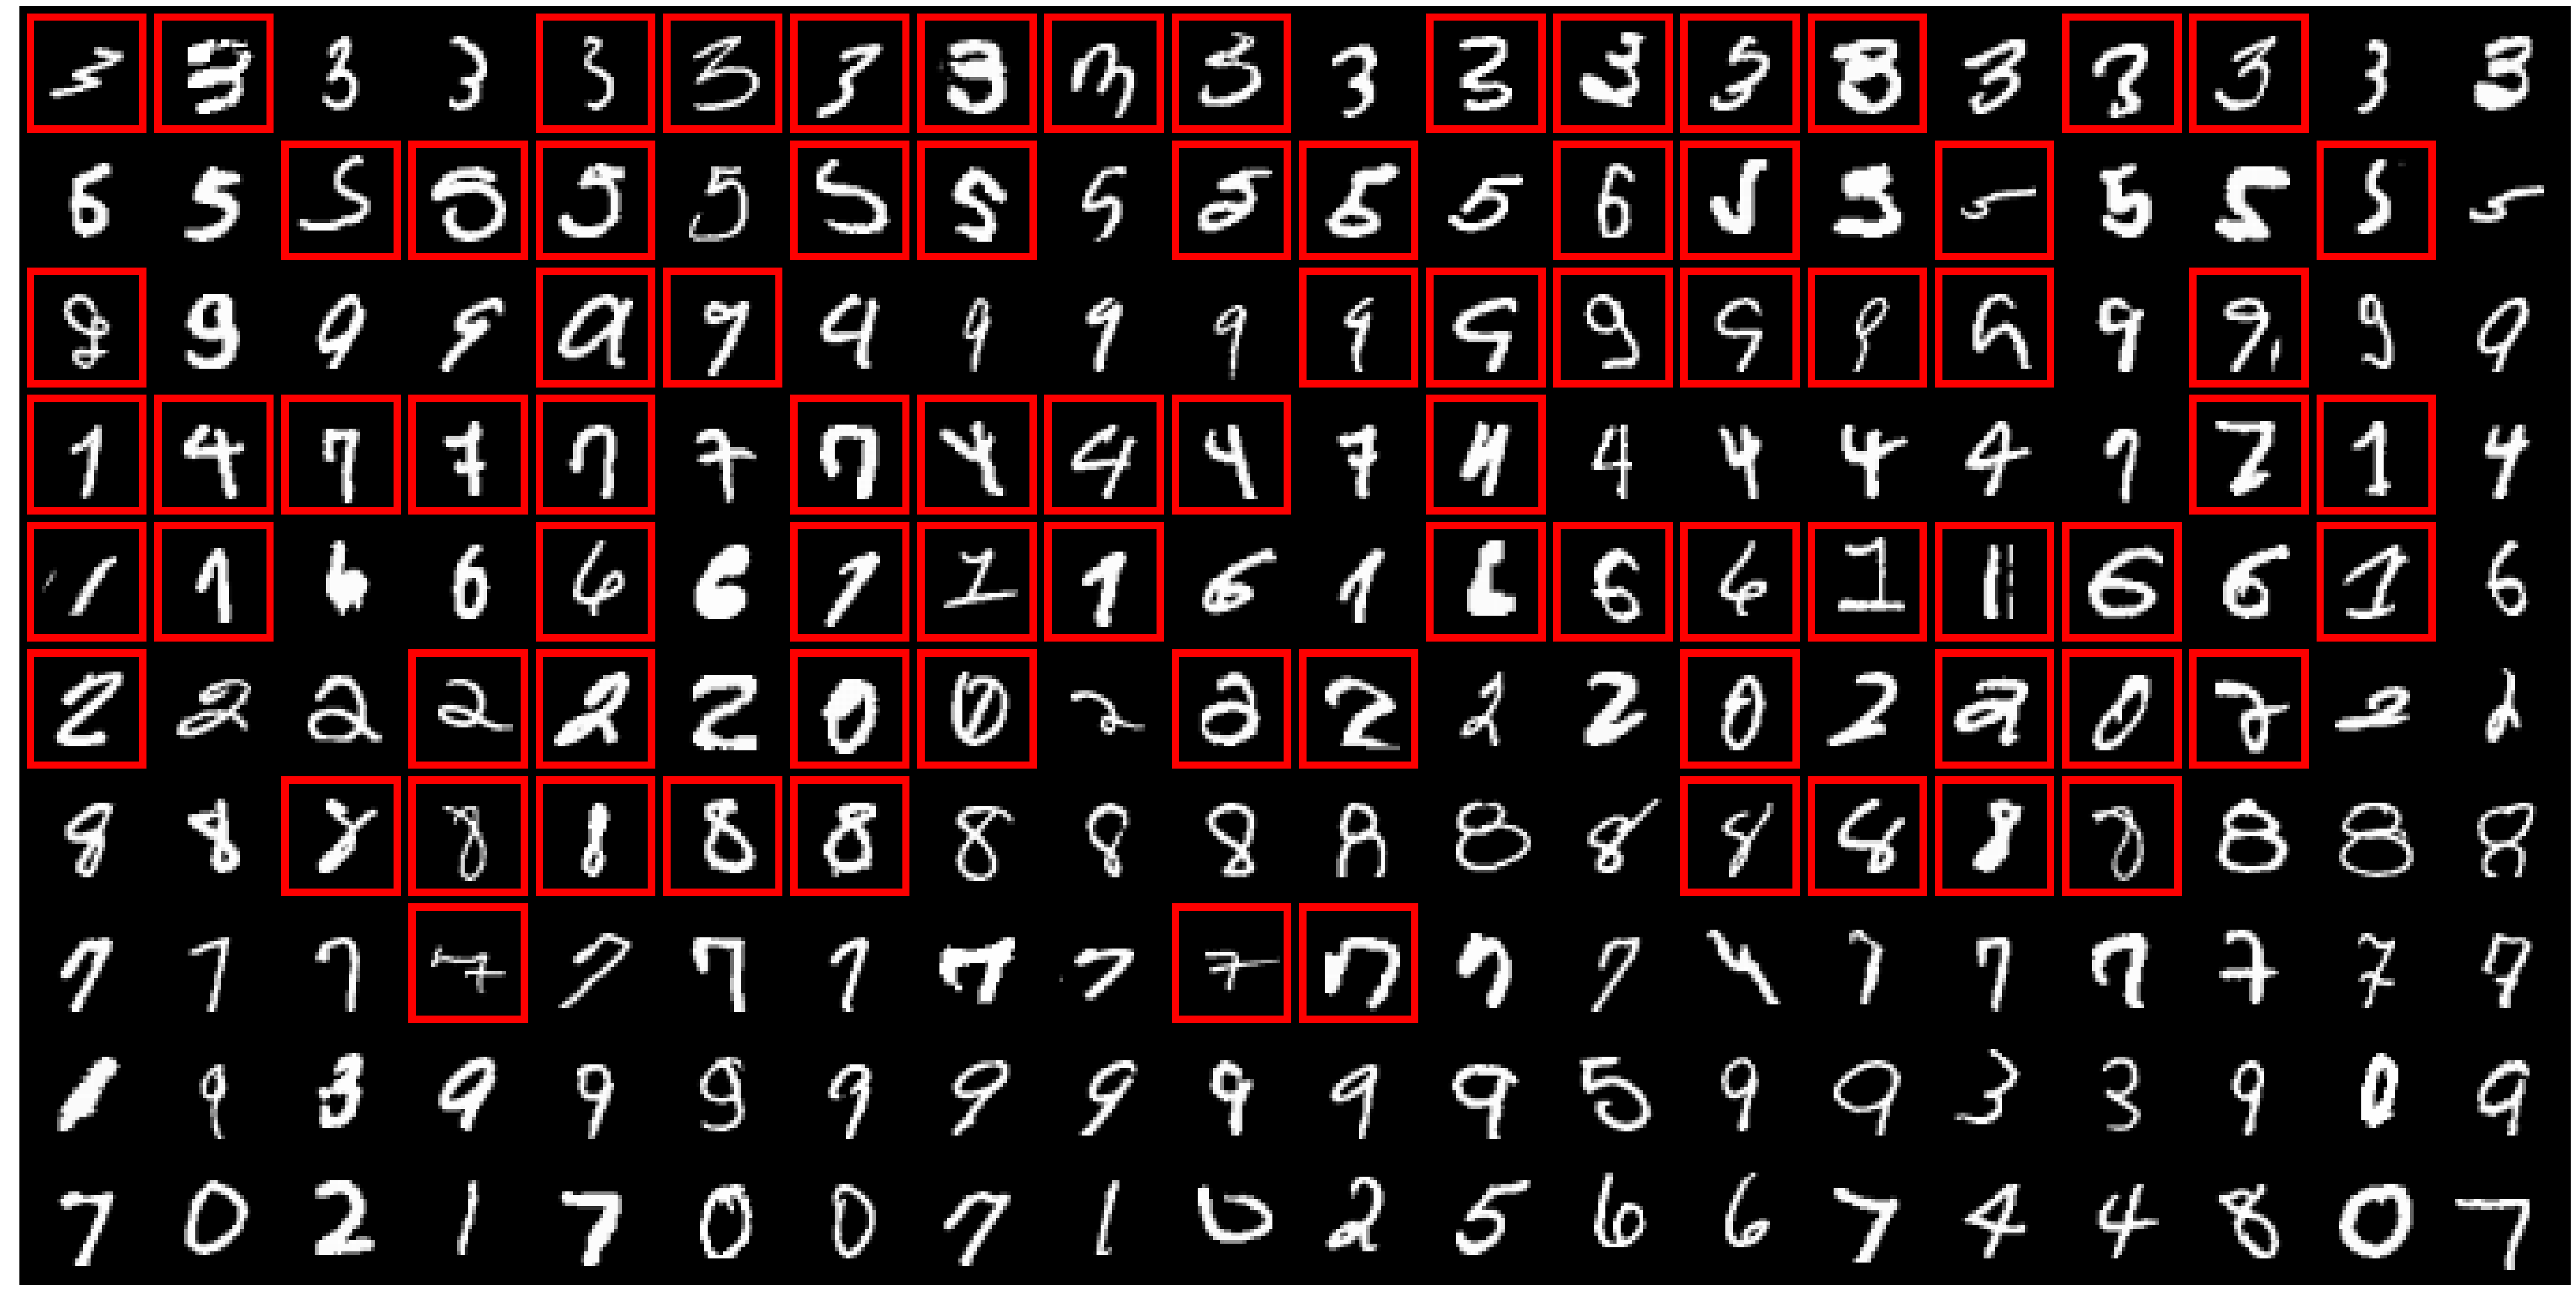

In [122]:
run_name='mlp,nclusters_10,citers_10'
plot_clusters(data, run_name)

* There is a pure cluster with 90% data low normC and ~100%
* Each other cluster found similar errors, e.g. 3 vs 8, 5 vs 6, 9 vs 7, and so on.
* When nclusters=2, the normC for bigger cluster is smaller when citers=10 vs citers=2 but average loss is bigger. why?